In [ ]:
!pip install openpyxl

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import Perceptron



from xgboost import XGBClassifier

In [ ]:
train = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")

<BarContainer object of 3 artists>

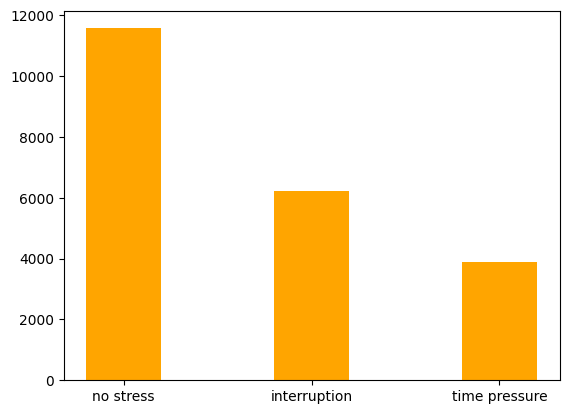

In [ ]:
conditions = dict(train['condition'].value_counts())
labels = list(conditions.keys())
counts = list(conditions.values())
plt.bar(labels,counts, color ='orange',width = 0.4)

In [ ]:
train.head()

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,SD1,...,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF,sampen,higuci,datasetId,condition
0,885.157845,853.763730,140.972741,15.554505,15.553371,9.063146,69.499952,11.133333,0.533333,11.001565,...,15.522603,0.421047,1.514737,3686.666157,65.018055,0.015380,2.139754,1.163485,2.0,no stress
1,939.425371,948.357865,81.317742,12.964439,12.964195,6.272369,64.363150,5.600000,0.000000,9.170129,...,2.108525,0.070133,0.304603,3006.487251,327.296635,0.003055,2.174499,1.084711,2.0,interruption
2,898.186047,907.006860,84.497236,16.305279,16.305274,5.182201,67.450066,13.066667,0.200000,11.533417,...,13.769729,0.512671,1.049528,2685.879461,94.280910,0.010607,2.135350,1.176315,2.0,interruption
3,881.757865,893.460030,90.370537,15.720468,15.720068,5.748591,68.809562,11.800000,0.133333,11.119476,...,18.181913,0.529387,1.775294,3434.520980,55.328701,0.018074,2.178341,1.179688,2.0,no stress
4,809.625331,811.184865,62.766242,19.213819,19.213657,3.266724,74.565728,20.200000,0.200000,13.590641,...,48.215822,1.839473,3.279993,2621.175204,29.487873,0.033912,2.221121,1.249612,2.0,no stress


In [ ]:
train.shape

(21665, 36)

In [ ]:
test.shape

(20001, 36)

In [ ]:
test.head()

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,SD1,...,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF,sampen,higuci,datasetId,condition
0,721.901897,727.267280,74.722315,12.361264,12.361069,6.044877,84.121868,4.933333,0.000000,8.743513,...,66.617057,3.921868,9.760289,1698.605390,9.245599,0.108160,2.097342,1.243696,2.0,no stress
1,843.538633,844.407930,58.499429,19.298880,19.298795,3.031234,71.478642,21.000000,0.200000,13.650863,...,26.500086,1.123416,1.663151,2358.884694,59.126832,0.016913,2.217275,1.250056,2.0,time pressure
2,958.523868,966.671125,132.849110,21.342715,21.342653,6.224565,63.874293,24.133333,1.800000,15.096571,...,16.024935,0.370208,0.766416,4328.633724,129.477524,0.007723,2.217136,1.144943,2.0,no stress
3,824.838669,842.485905,117.822094,11.771814,11.771248,10.008830,74.330531,4.733333,0.533333,8.326307,...,17.581470,0.615932,3.358652,2854.449091,28.773854,0.034754,2.106863,1.142355,2.0,no stress
4,756.707933,747.941620,143.968457,13.357748,13.356388,10.777899,82.092049,5.933333,0.666667,9.447545,...,35.199054,0.662879,6.292253,5310.027472,14.892559,0.067148,1.912191,1.128098,2.0,interruption


In [ ]:
train["condition"].value_counts()

,count
condition,
no stress,11566
interruption,6226
time pressure,3872


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21665 entries, 0 to 21664
Data columns (total 36 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEAN_RR            21665 non-null  float64
 1   MEDIAN_RR          21665 non-null  float64
 2   SDRR               21665 non-null  float64
 3   RMSSD              21665 non-null  float64
 4   SDSD               21665 non-null  float64
 5   SDRR_RMSSD         21665 non-null  float64
 6   HR                 21665 non-null  float64
 7   pNN25              21665 non-null  float64
 8   pNN50              21665 non-null  float64
 9   SD1                21665 non-null  float64
 10  SD2                21665 non-null  float64
 11  KURT               21665 non-null  float64
 12  SKEW               21665 non-null  float64
 13  MEAN_REL_RR        21664 non-null  float64
 14  MEDIAN_REL_RR      21664 non-null  float64
 15  SDRR_REL_RR        21664 non-null  float64
 16  RMSSD_REL_RR       216

In [ ]:
train.isna().sum()

,0
MEAN_RR,0
MEDIAN_RR,0
SDRR,0
RMSSD,0
SDSD,0
SDRR_RMSSD,0
HR,0
pNN25,0
pNN50,0
SD1,0


In [ ]:
le = preprocessing.LabelEncoder()
le.fit(train['condition'])
train['condition'] = le.transform(train['condition'])
e = test['condition'].unique()
test['condition'] = le.transform(test['condition'])

In [ ]:
f = le.transform(e)
print(f)

[1 2 0 3]


In [ ]:
g = le.inverse_transform(f)
print(g)
# 1 = no stress
# 2 = time pressure
# 0 = interruption

['no stress' 'time pressure' 'interruption' nan]


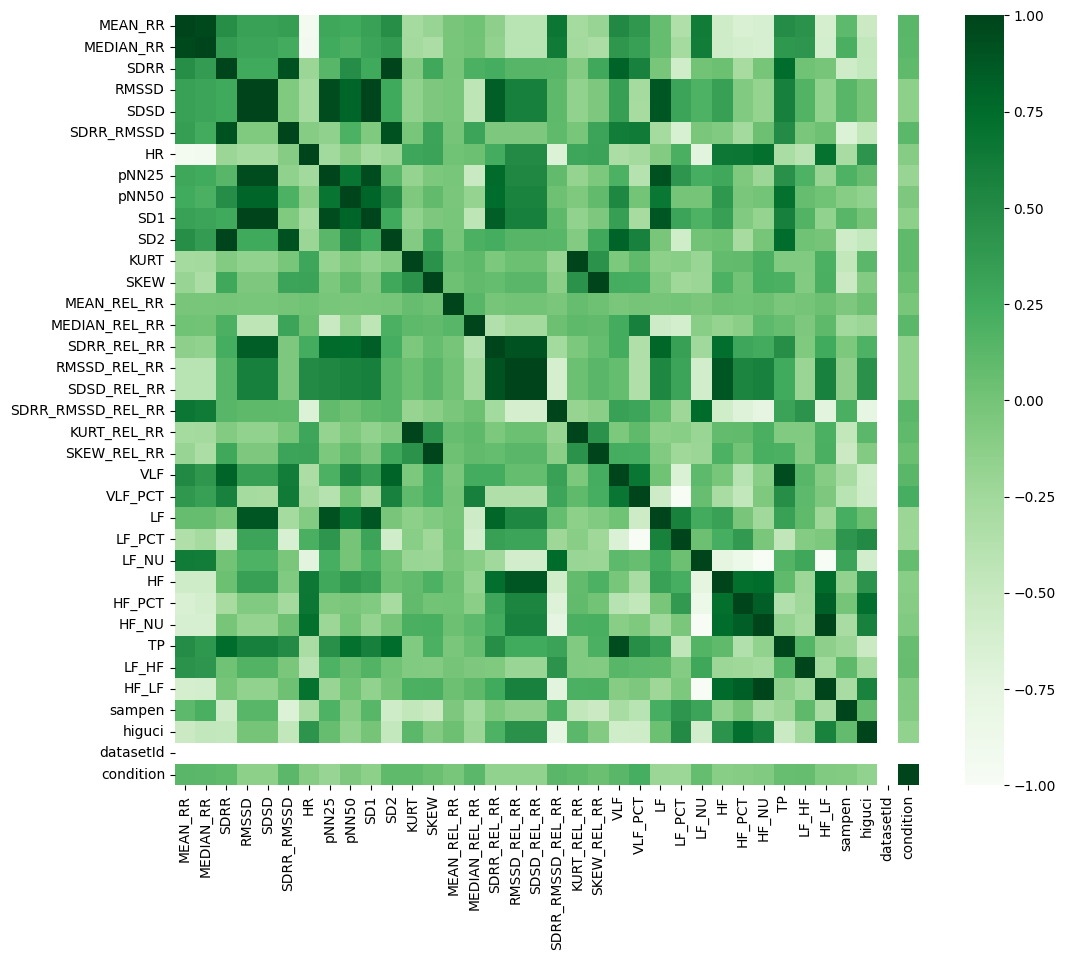

In [ ]:
plt.figure(figsize=(12,10))
corr = train.corr()
sns.heatmap(corr, annot=False, cmap=plt.cm.Greens)
plt.show()

In [ ]:
def feature_selection(correlation,threshold):
    selected_features = []
    for i in range(corr.shape[0]):
      if corr.iloc[i,35] > threshold:
        selected_features.append(train.iloc[:,i])
    return pd.DataFrame(selected_features).T

In [ ]:
train.head()

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,SD1,...,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF,sampen,higuci,datasetId,condition
0,885.157845,853.763730,140.972741,15.554505,15.553371,9.063146,69.499952,11.133333,0.533333,11.001565,...,15.522603,0.421047,1.514737,3686.666157,65.018055,0.015380,2.139754,1.163485,2.0,1
1,939.425371,948.357865,81.317742,12.964439,12.964195,6.272369,64.363150,5.600000,0.000000,9.170129,...,2.108525,0.070133,0.304603,3006.487251,327.296635,0.003055,2.174499,1.084711,2.0,0
2,898.186047,907.006860,84.497236,16.305279,16.305274,5.182201,67.450066,13.066667,0.200000,11.533417,...,13.769729,0.512671,1.049528,2685.879461,94.280910,0.010607,2.135350,1.176315,2.0,0
3,881.757865,893.460030,90.370537,15.720468,15.720068,5.748591,68.809562,11.800000,0.133333,11.119476,...,18.181913,0.529387,1.775294,3434.520980,55.328701,0.018074,2.178341,1.179688,2.0,1
4,809.625331,811.184865,62.766242,19.213819,19.213657,3.266724,74.565728,20.200000,0.200000,13.590641,...,48.215822,1.839473,3.279993,2621.175204,29.487873,0.033912,2.221121,1.249612,2.0,1


In [ ]:
CORRELATION_THRESHOLD = 0.1
nn_train = train.copy()
reduced_train = feature_selection(corr,CORRELATION_THRESHOLD)
reduced_train.head()

,MEAN_RR,MEDIAN_RR,SDRR,SDRR_RMSSD,SD2,MEDIAN_REL_RR,SDRR_RMSSD_REL_RR,VLF,VLF_PCT,condition
0,885.157845,853.763730,140.972741,9.063146,199.061782,-0.000179,2.143342,2661.894136,72.203287,1.0
1,939.425371,948.357865,81.317742,6.272369,114.634458,0.000611,2.930855,2314.265450,76.975728,0.0
2,898.186047,907.006860,84.497236,5.182201,118.939253,-0.000263,2.127053,1373.887112,51.152225,0.0
3,881.757865,893.460030,90.370537,5.748591,127.318597,0.000494,2.050988,2410.357408,70.180308,1.0
4,809.625331,811.184865,62.766242,3.266724,87.718281,-0.002736,1.816544,1151.177330,43.918366,1.0


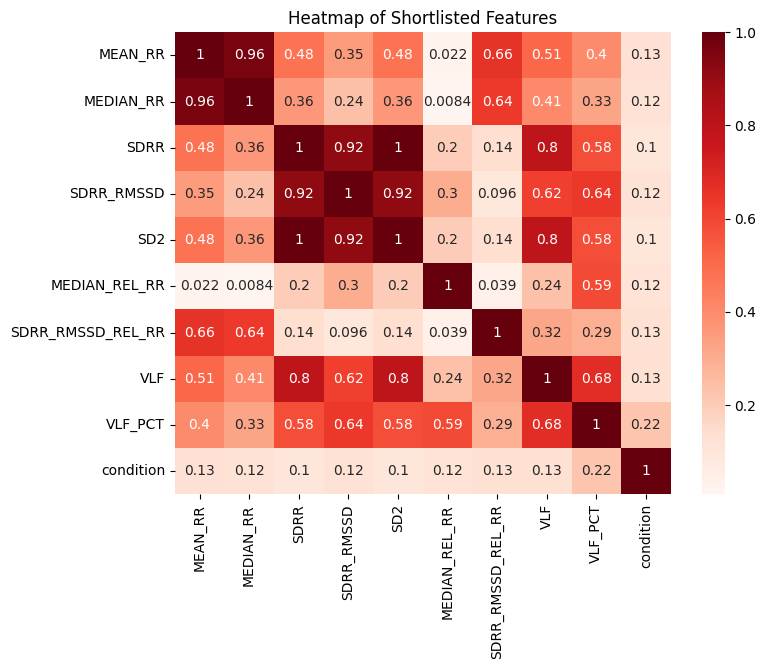

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(reduced_train.corr(), annot=True, cmap='Reds')
plt.title('Heatmap of Shortlisted Features')
plt.show()

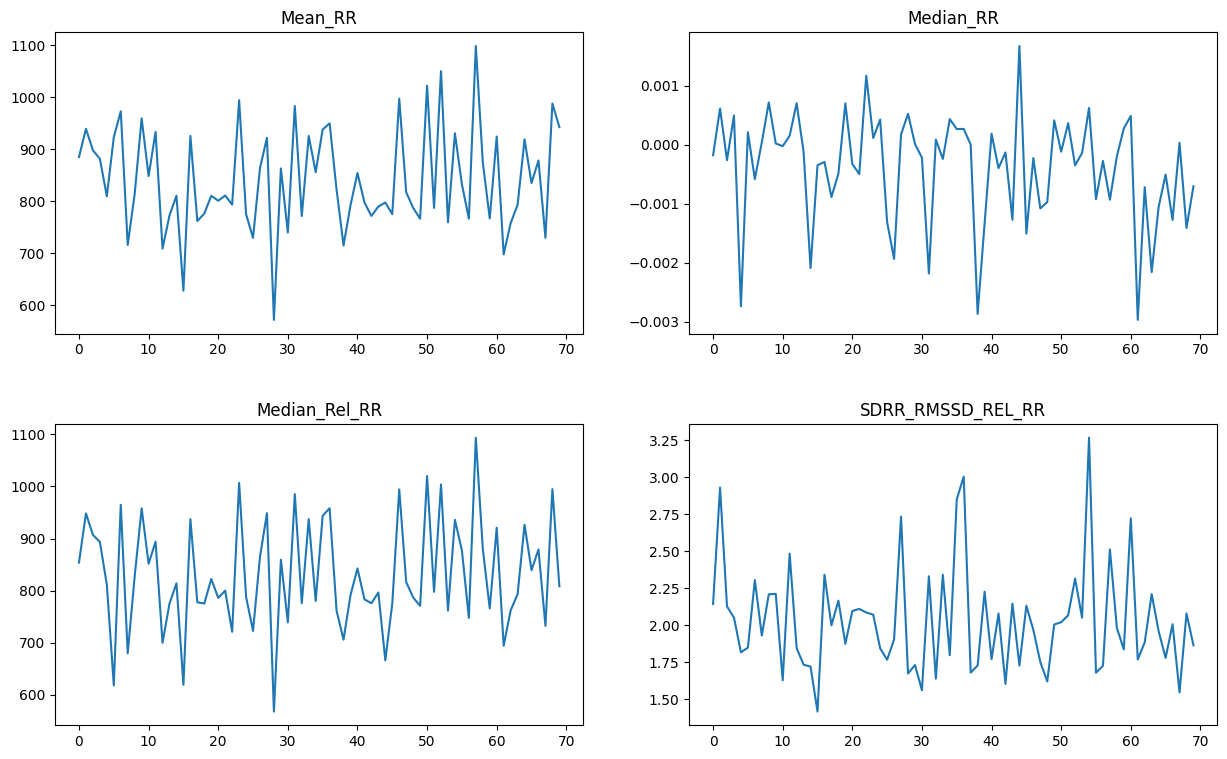

In [ ]:
fig, axarr = plt.subplots(2, 2, figsize=(15, 9))
reduced_train['MEAN_RR'][:70].plot(ax=axarr[0][0])
reduced_train['MEDIAN_RR'][:70].plot(ax=axarr[1][0])
reduced_train['MEDIAN_REL_RR'][:70].plot(ax=axarr[0][1])
reduced_train['SDRR_RMSSD_REL_RR'][:70].plot(ax=axarr[1][1])
axarr[0][0].set_title("Mean_RR")
axarr[0][1].set_title("Median_RR")
axarr[1][0].set_title("Median_Rel_RR")
axarr[1][1].set_title("SDRR_RMSSD_REL_RR")
plt.subplots_adjust(hspace=.3)

<Axes: >

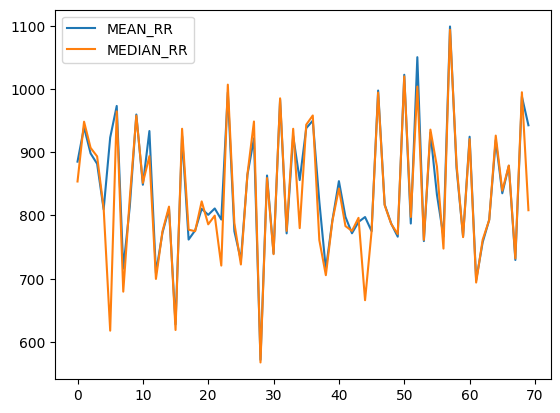

In [ ]:
reduced_train[['MEAN_RR','MEDIAN_RR']][:70].plot()


In [ ]:
x_train = reduced_train.iloc[:,:-1]
y_train = reduced_train.iloc[:,-1]

In [ ]:
nn_x_train = nn_train.iloc[:,:-1]
nn_y_train = nn_train.iloc[:,-1]

In [ ]:
nn_x_test = test[nn_x_train.columns]
x_test = test[x_train.columns]
y_test = test['condition']

In [ ]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
dt_model = DecisionTreeClassifier(criterion="entropy", max_depth=14)
dt_model = dt_model.fit(x_train,y_train)

In [ ]:

rf_prediction = rf_model.predict(x_test)
dt_prediction = dt_model.predict(x_test)

In [ ]:
print(classification_report(y_test,rf_prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5779
           1       1.00      1.00      1.00     10749
           2       1.00      1.00      1.00      3472
           3       0.00      0.00      0.00         1

    accuracy                           1.00     20001
   macro avg       0.75      0.75      0.75     20001
weighted avg       1.00      1.00      1.00     20001



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
print(classification_report(y_test,dt_prediction))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      5779
           1       0.97      0.97      0.97     10749
           2       0.93      0.90      0.92      3472
           3       0.00      0.00      0.00         1

    accuracy                           0.96     20001
   macro avg       0.71      0.71      0.71     20001
weighted avg       0.96      0.96      0.96     20001



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
le.inverse_transform(test['condition'].unique())

array(['no stress', 'time pressure', 'interruption', nan], dtype=object)

In [ ]:
Evaluation_Results = pd.DataFrame(np.zeros((2,5)), columns=['Accuracy', 'Precision','Recall','F1-score','AUC-ROC score'])
Evaluation_Results.index=['Random Forest', 'Decision Tree']

In [ ]:
import math


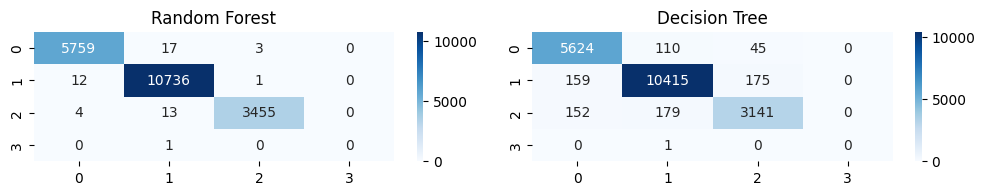

In [ ]:
def plot_cm(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.columns=labels
    cm.index=labels
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    sns.heatmap(cm, annot=annot, fmt='')# cmap= "GnBu"

def conf_mat_plot(all_models):
    plt.figure(figsize=[20,3.5*math.ceil(len(all_models)*len(labels)/14)])

    for i in range(len(all_models)):
        if len(labels)<=4:
            plt.subplot(2,4,i+1)
        else:
            plt.subplot(math.ceil(len(all_models)/3),3,i+1)
        pred = all_models[i].predict(x_test)
        sns.heatmap(confusion_matrix(y_test, pred), annot=True, cmap='Blues', fmt='.0f') #vmin=0,vmax=5
        plt.title(Evaluation_Results.index[i])
    plt.tight_layout()
    plt.show()

conf_mat_plot([rf_model,dt_model])

In [ ]:
from sklearn.metrics import classification_report



Train data shape: (369289, 36)
Test data shape: (41033, 36)


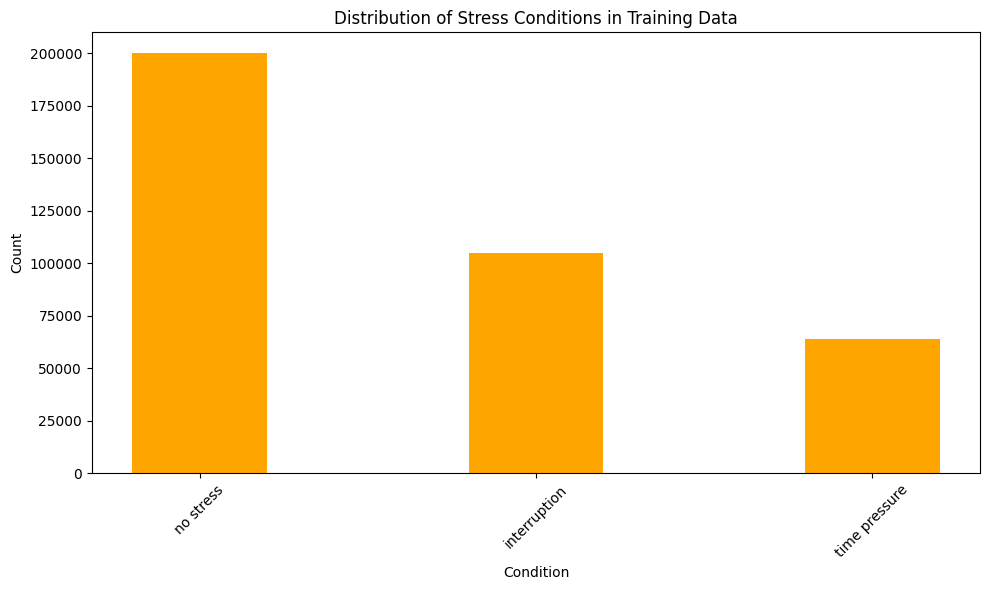

Condition Mapping:
interruption = 0
no stress = 1
time pressure = 2


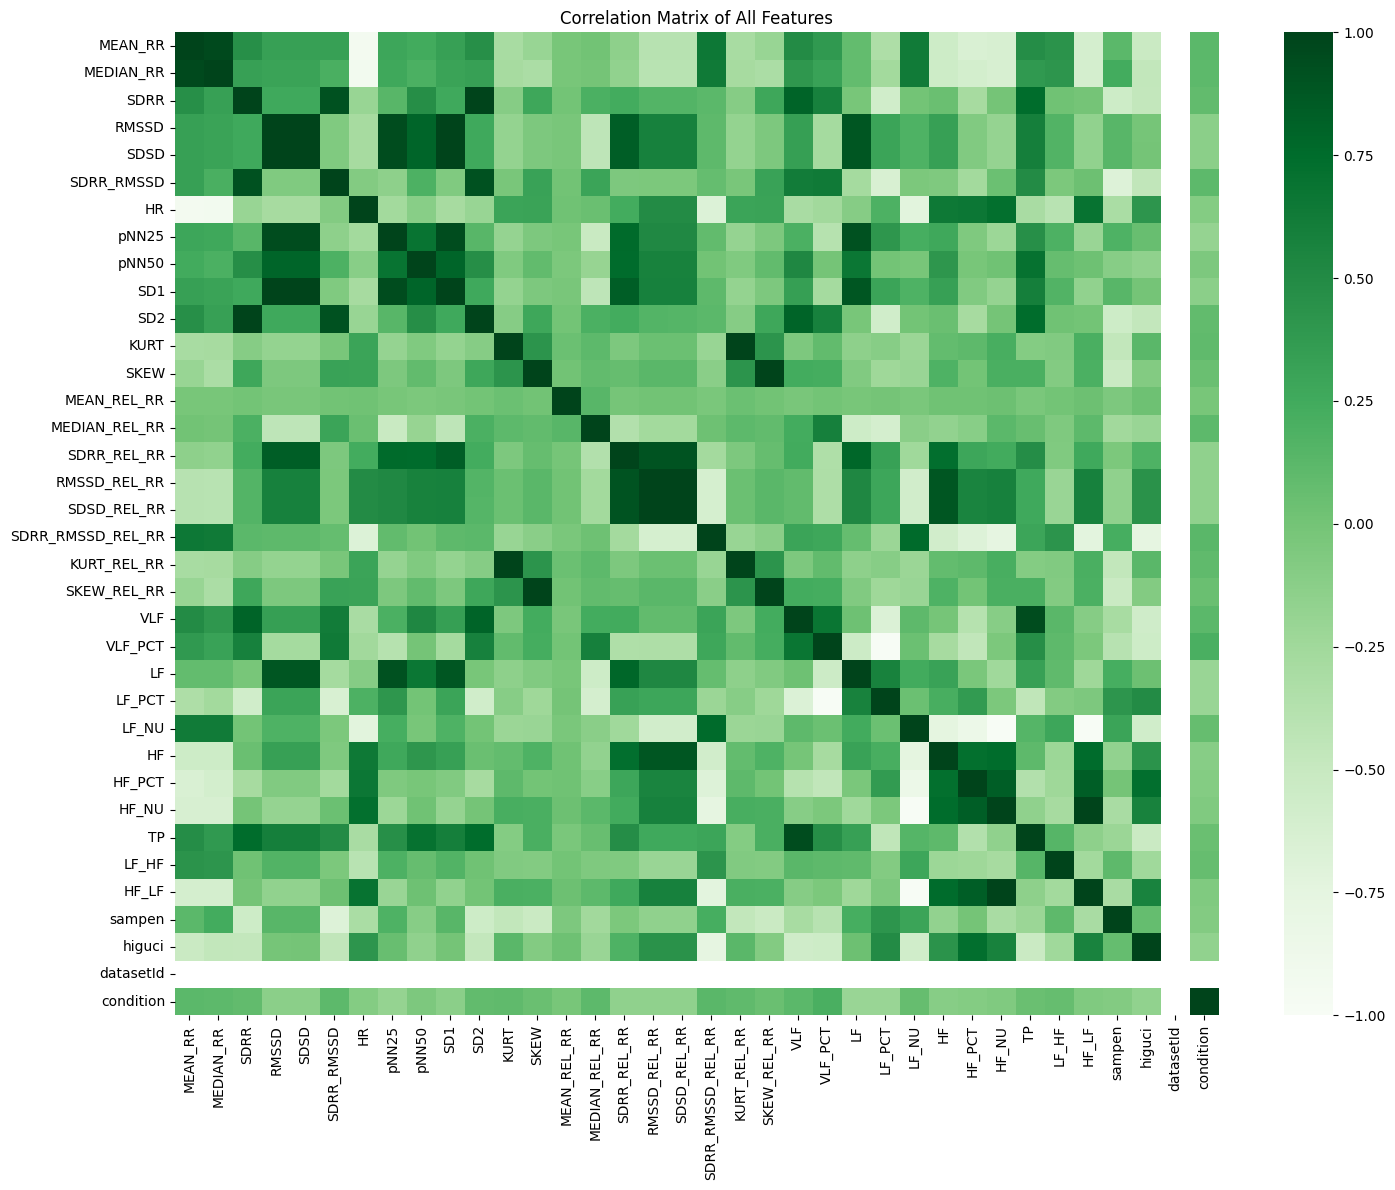

Selected 19 features with correlation > 0.1:
['MEAN_RR', 'MEDIAN_RR', 'RMSSD', 'SDSD', 'SDRR_RMSSD', 'pNN25', 'SD1', 'MEDIAN_REL_RR', 'SDRR_REL_RR', 'RMSSD_REL_RR', 'SDSD_REL_RR', 'SDRR_RMSSD_REL_RR', 'VLF', 'VLF_PCT', 'LF', 'LF_PCT', 'HF', 'higuci', 'condition']


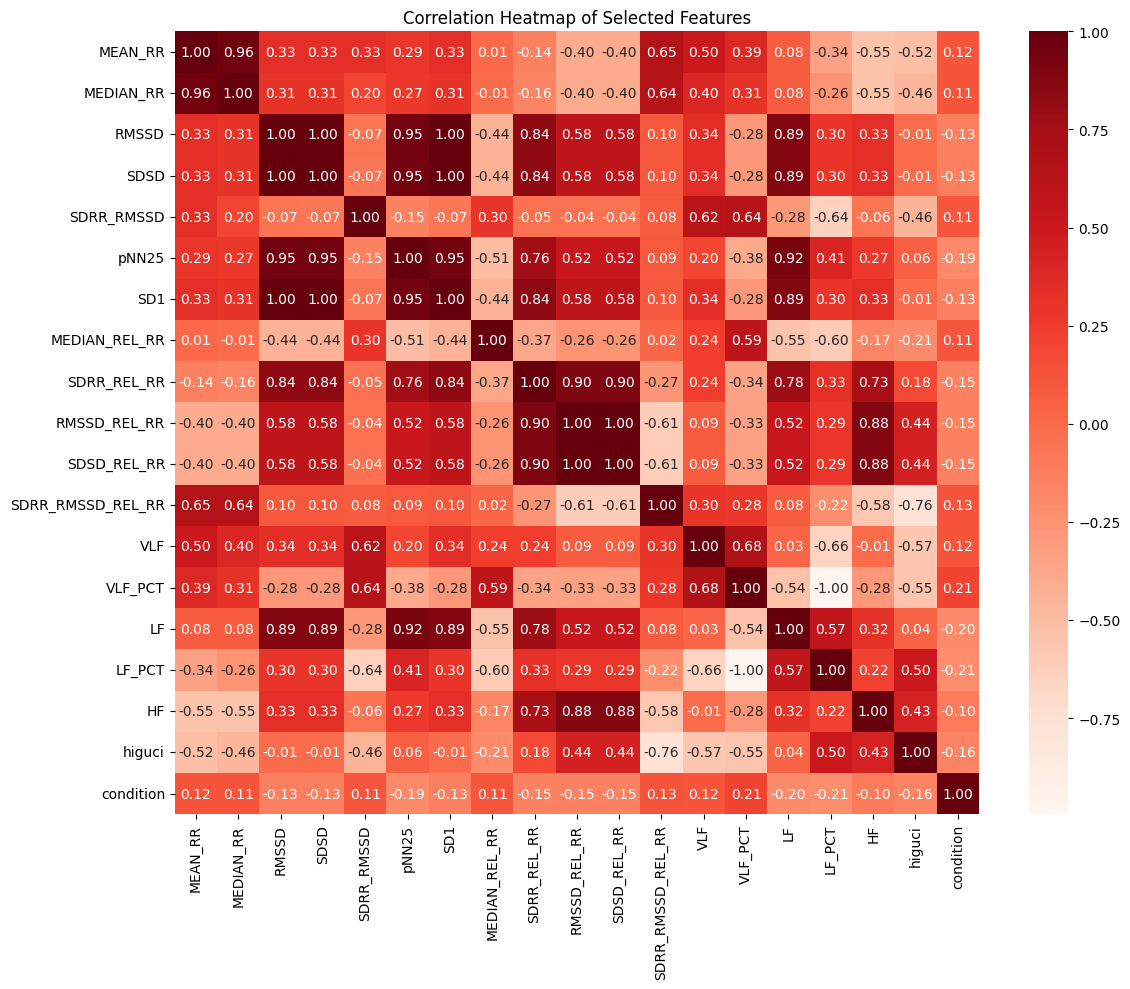

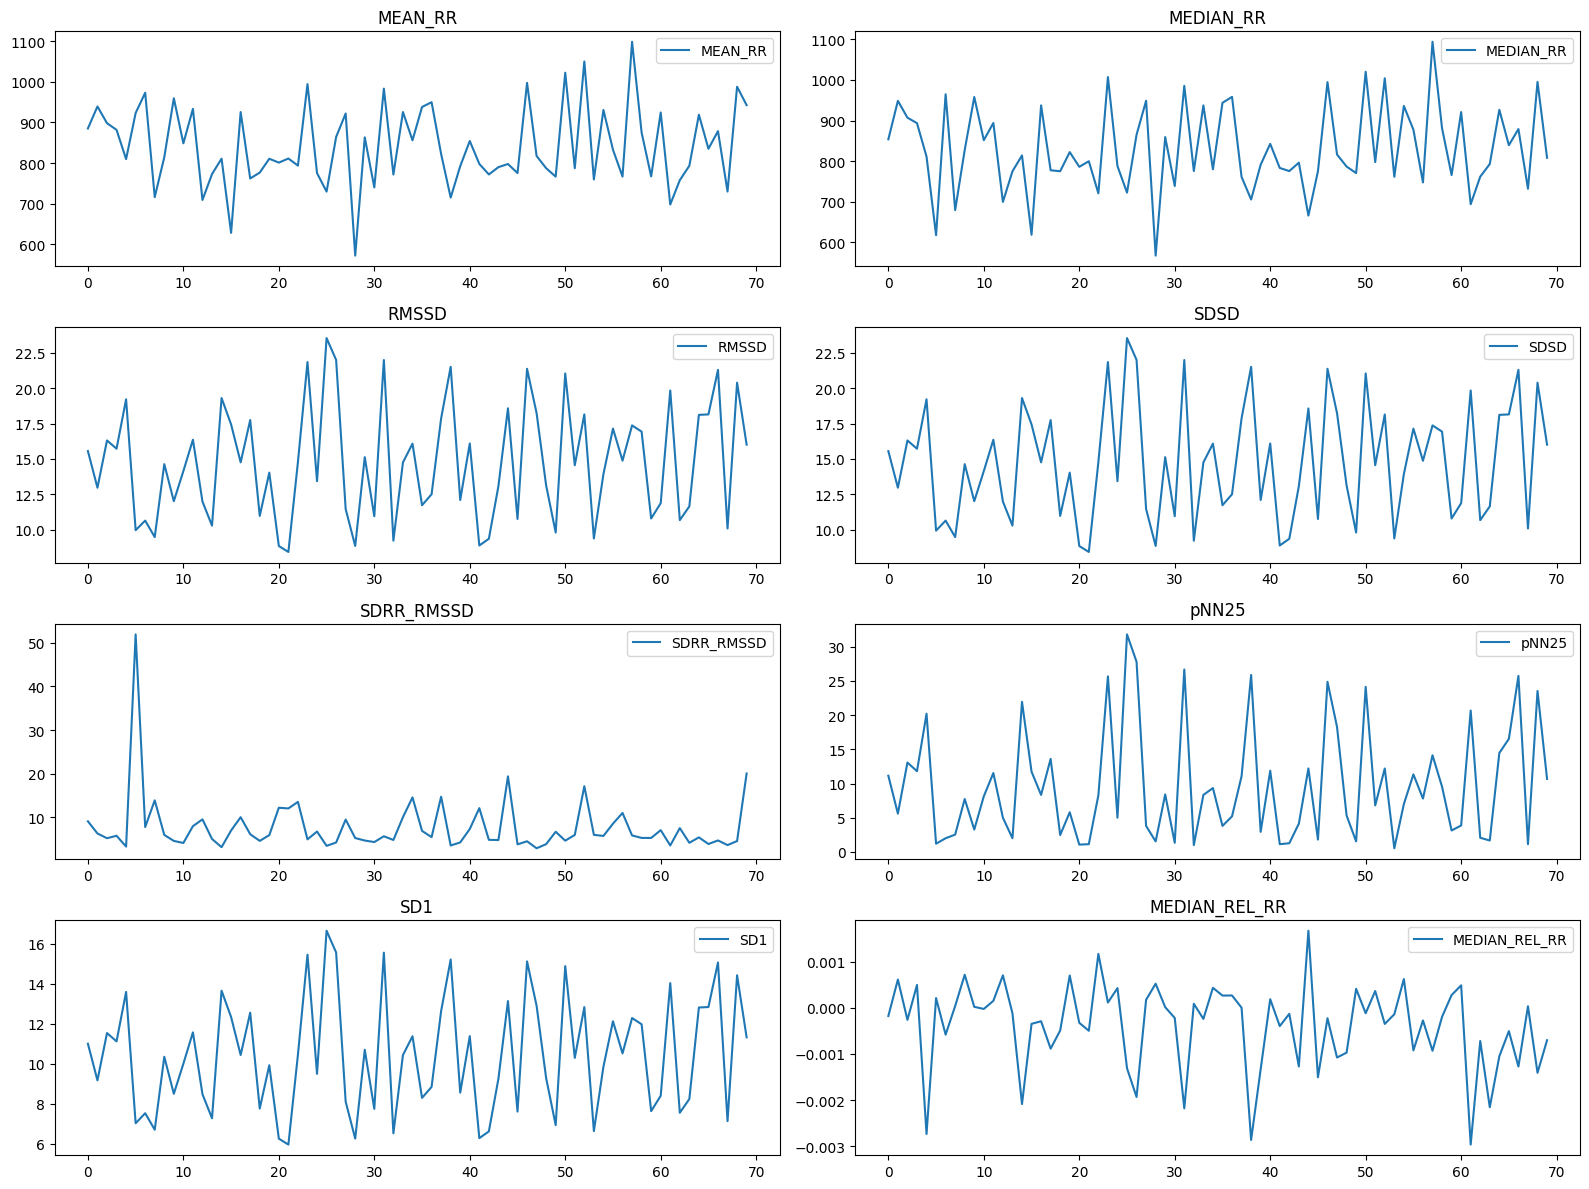

Training Random Forest...

Random Forest Classification Report:
               precision    recall  f1-score   support

 interruption       1.00      1.00      1.00     11782
    no stress       1.00      1.00      1.00     22158
time pressure       1.00      1.00      1.00      7093

     accuracy                           1.00     41033
    macro avg       1.00      1.00      1.00     41033
 weighted avg       1.00      1.00      1.00     41033

Training Decision Tree...

Decision Tree Classification Report:
               precision    recall  f1-score   support

 interruption       0.99      0.99      0.99     11782
    no stress       0.96      0.99      0.98     22158
time pressure       0.98      0.89      0.93      7093

     accuracy                           0.97     41033
    macro avg       0.98      0.96      0.97     41033
 weighted avg       0.97      0.97      0.97     41033

Training K-Nearest Neighbors...

K-Nearest Neighbors Classification Report:
               preci

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
import math
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

# Load the dataset (assuming paths are correct)
train = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")

# Basic EDA
print("Train data shape:", train.shape)
print("Test data shape:", test.shape)

# Visualize class distribution
plt.figure(figsize=(10, 6))
conditions = dict(train['condition'].value_counts())
labels = list(conditions.keys())
counts = list(conditions.values())
plt.bar(labels, counts, color='orange', width=0.4)
plt.title('Distribution of Stress Conditions in Training Data')
plt.xlabel('Condition')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Encode labels
le = preprocessing.LabelEncoder()
le.fit(train['condition'])
train['condition'] = le.transform(train['condition'])
test['condition'] = le.transform(test['condition'])

# Display label encoding
condition_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Condition Mapping:")
for condition, code in condition_mapping.items():
    print(f"{condition} = {code}")

# Correlation matrix for feature selection
plt.figure(figsize=(15, 12))
corr = train.corr()
sns.heatmap(corr, annot=False, cmap='Greens')
plt.title('Correlation Matrix of All Features')
plt.tight_layout()
plt.show()

# Feature selection based on correlation threshold
def feature_selection(correlation, threshold, target_col_index):
    selected_features = []
    feature_names = []
    for i in range(correlation.shape[0]):
        if abs(correlation.iloc[i, target_col_index]) > threshold:
            col_name = correlation.index[i]
            feature_names.append(col_name)
            selected_features.append(train[col_name])
    return pd.DataFrame(selected_features).T, feature_names

CORRELATION_THRESHOLD = 0.1
target_col_index = train.columns.get_loc('condition')
reduced_train, selected_features = feature_selection(corr, CORRELATION_THRESHOLD, target_col_index)

print(f"Selected {len(selected_features)} features with correlation > {CORRELATION_THRESHOLD}:")
print(selected_features)

# Display correlation of selected features
plt.figure(figsize=(12, 10))
sns.heatmap(reduced_train.corr(), annot=True, cmap='Reds', fmt=".2f")
plt.title('Correlation Heatmap of Selected Features')
plt.tight_layout()
plt.show()

# Visualize selected features over time
n_features_to_plot = min(8, len(selected_features)-1)  # Exclude condition column
fig, axs = plt.subplots(n_features_to_plot//2, 2, figsize=(16, 12))
axs = axs.flatten()

for i in range(n_features_to_plot):
    feature = selected_features[i]
    if feature != 'condition':
        axs[i].plot(reduced_train[feature][:70], label=feature)
        axs[i].set_title(feature)
        axs[i].legend()

plt.tight_layout()
plt.show()

# Prepare features and target variables
X_train = reduced_train.drop('condition', axis=1)
y_train = reduced_train['condition']

X_test = test[X_train.columns]
y_test = test['condition']

# Initialize classification models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Decision Tree': DecisionTreeClassifier(criterion="entropy", max_depth=14, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'Naive Bayes': GaussianNB()
}

# Train and evaluate models
results = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1-score', 'AUC-ROC'])
predictions = {}
cv_scores = {}

# Train and predict with each model
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)
    predictions[name] = y_pred

    # Compute metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # For AUC-ROC with multiclass, use one-vs-rest approach
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)
        auc_roc = roc_auc_score(y_test, y_prob, multi_class='ovr', average='weighted')
    else:
        auc_roc = np.nan

    # Store results
    results.loc[name] = [accuracy, precision, recall, f1, auc_roc]

    # Cross-validation
    cv_score = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores[name] = cv_score.mean()

    # Classification report
    print(f"\n{name} Classification Report:")
    report = classification_report(y_test, y_pred, target_names=le.classes_)
    print(report)

# Add cross-validation scores to results
results['CV Accuracy'] = pd.Series(cv_scores)

# Sort by accuracy
results = results.sort_values('Accuracy', ascending=False)
print("\nModel Performance Summary:")
print(results)

# Function to plot confusion matrices
def plot_confusion_matrices(y_true, predictions, class_names):
    n_models = len(predictions)
    n_cols = 2
    n_rows = math.ceil(n_models / n_cols)

    plt.figure(figsize=(15, n_rows * 6))

    for i, (name, y_pred) in enumerate(predictions.items()):
        plt.subplot(n_rows, n_cols, i+1)
        cm = confusion_matrix(y_true, y_pred)

        # Normalize confusion matrix
        cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

        # Create text annotations
        annot = np.empty_like(cm).astype(str)
        for j in range(cm.shape[0]):
            for k in range(cm.shape[1]):
                annot[j, k] = f"{cm[j, k]}\n({cm_norm[j, k]:.2%})"

        # Plot heatmap
        sns.heatmap(cm, annot=annot, fmt='', cmap='Blues',
                   xticklabels=class_names, yticklabels=class_names)
        plt.title(f'{name} Confusion Matrix')
        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')

    plt.tight_layout()
    plt.show()

# Visualize confusion matrices
plot_confusion_matrices(y_test, predictions, le.classes_)

# Plot accuracy comparison
plt.figure(figsize=(12, 6))
sns.barplot(x=results.index, y=results['Accuracy'], palette='viridis')
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Compare all metrics in a single plot
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
plt.figure(figsize=(14, 8))

# Prepare data for grouped bar chart
metrics_data = results[metrics].T

# Plot grouped bar chart
metrics_data.plot(kind='bar', figsize=(14, 8))
plt.title('Performance Metrics Comparison Across Models')
plt.ylabel('Score')
plt.xlabel('Metric')
plt.xticks(rotation=0)
plt.legend(title='Models', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Feature importance for models that support it
feature_importance_models = {
    'Random Forest': models['Random Forest'],
    'XGBoost': models['XGBoost'],
    'Gradient Boosting': models['Gradient Boosting']
}

plt.figure(figsize=(15, 12))
i = 1
for name, model in feature_importance_models.items():
    if hasattr(model, 'feature_importances_'):
        plt.subplot(len(feature_importance_models), 1, i)

        # Sort feature importances
        importances = model.feature_importances_
        indices = np.argsort(importances)[::-1]
        features = X_train.columns

        # Plot top 15 features
        top_n = min(15, len(features))
        plt.bar(range(top_n), importances[indices[:top_n]], align='center')
        plt.xticks(range(top_n), [features[i] for i in indices[:top_n]], rotation=90)
        plt.title(f'Top {top_n} Feature Importances - {name}')
        plt.tight_layout()
        i += 1

plt.tight_layout()
plt.show()

# Cross-validation performance
plt.figure(figsize=(12, 6))
cv_results = pd.DataFrame(list(cv_scores.items()), columns=['Model', 'CV Accuracy'])
cv_results = cv_results.sort_values('CV Accuracy', ascending=False)

sns.barplot(x='Model', y='CV Accuracy', data=cv_results, palette='plasma')
plt.title('5-Fold Cross-Validation Accuracy Comparison')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# ROC Curve for multiclass classification (one-vs-rest)
from sklearn.metrics import roc_curve, auc
from itertools import cycle

plt.figure(figsize=(12, 10))

# Only use models that support predict_proba
proba_models = {name: model for name, model in models.items() if hasattr(model, 'predict_proba')}

# Colors for ROC curves
colors = cycle(['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink', 'gray'])

# Get unique classes
n_classes = len(np.unique(y_test))

# Plot ROC curves for each class and each model
for name, model in proba_models.items():
    y_score = model.predict_proba(X_test)

    # Compute ROC curve and AUC for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        # Prepare one-vs-rest encoding
        y_true_bin = (y_test == i).astype(int)
        fpr[i], tpr[i], _ = roc_curve(y_true_bin, y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC curves
    color = next(colors)
    for i, condition in enumerate(le.classes_):
        plt.plot(fpr[i], tpr[i], color=color, lw=2, alpha=0.7,
                 label=f'{name} - {condition} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Models and Classes')
plt.legend(loc="lower right", bbox_to_anchor=(1.05, 0), ncol=1)
plt.grid(linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Visualize class distribution per feature
plt.figure(figsize=(18, 12))

# Select top features based on importance (from Random Forest)
top_features = []
if hasattr(models['Random Forest'], 'feature_importances_'):
    importances = models['Random Forest'].feature_importances_
    indices = np.argsort(importances)[::-1]
    top_n = min(6, len(X_train.columns))
    top_features = [X_train.columns[i] for i in indices[:top_n]]

# If feature importance wasn't available, use first few features
if not top_features:
    top_features = X_train.columns[:6]

# Prepare a combined dataset with original labels for visualization
viz_data = X_train.copy()
viz_data['condition'] = y_train
viz_data['condition_label'] = le.inverse_transform(y_train)

# Create distribution plots
for i, feature in enumerate(top_features):
    plt.subplot(2, 3, i+1)
    for condition in le.classes_:
        condition_data = viz_data[viz_data['condition_label'] == condition]
        sns.kdeplot(condition_data[feature], label=condition)
    plt.title(f'Distribution of {feature} by Condition')
    plt.xlabel(feature)
    plt.legend()

plt.tight_layout()
plt.show()

# Create a comprehensive comparison table
comparison_df = results.copy()

# Add additional metrics
for name, y_pred in predictions.items():
    # Add accuracy per class
    for i, condition in enumerate(le.classes_):
        y_true_bin = (y_test == i).astype(int)
        y_pred_bin = (y_pred == i).astype(int)
        class_acc = accuracy_score(y_true_bin, y_pred_bin)
        comparison_df.loc[name, f'Accuracy_{condition}'] = class_acc

comparison_df = comparison_df.round(3)
print("\nComprehensive Model Comparison:")
print(comparison_df)

# Summary visualization of all metrics
plt.figure(figsize=(15, 10))
comparison_df[['Accuracy', 'Precision', 'Recall', 'F1-score', 'CV Accuracy']].plot(kind='bar', figsize=(15, 8))
plt.title('Comprehensive Performance Metrics Comparison')
plt.ylabel('Score')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=5)
plt.tight_layout()
plt.show()

# Final model recommendations
print("\n=== Final Model Recommendations ===")
best_model = results.index[0]
print(f"Best Overall Model: {best_model} with {results.loc[best_model, 'Accuracy']:.3f} accuracy")

print("\nTop 3 Models:")
for i, model in enumerate(results.index[:3]):
    print(f"{i+1}. {model}: Accuracy = {results.loc[model, 'Accuracy']:.3f}, F1 = {results.loc[model, 'F1-score']:.3f}")

print("\nModel Selection Considerations:")
print("1. If accuracy is the primary concern: Use", results.index[results['Accuracy'].argmax()])
print("2. If balanced precision and recall are important: Use", results.index[results['F1-score'].argmax()])
print("3. If model stability across different datasets is crucial: Use", results.index[results['CV Accuracy'].argmax()])